In [1]:
from pprint import pprint

from sklearnex import patch_sklearn

from drowsiness_detection.run_grid_search_experiment import base

patch_sklearn()
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv  # noqa
# now you can import normally from model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from drowsiness_detection import config

from drowsiness_detection.data import (session_type_mapping, get_feature_data,
    preprocess_feature_data, label_names_dict)
import math

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [18]:
config.set_paths(30, 20)


In [19]:
data = get_feature_data(data_path=config.PATHS.WINDOW_FEATURES)


In [20]:
data.shape

(48108, 788)

In [3]:
base_config = base()
pprint(base_config)

{'exclude_by': 'a',
 'grid_search_params': {'error_score': 0,
                        'n_jobs': -1,
                        'refit': False,
                        'scoring': None,
                        'verbose': 1},
 'hyperparameter_specs': None,
 'model_name': None,
 'model_selection_name': 'halving-random',
 'n_splits': 10,
 'num_targets': 2,
 'recording_frequency': None,
 'scaler_name': '',
 'seed': 123,
 'test_size': 0.2,
 'use_dummy_data': False,
 'window_in_sec': None}


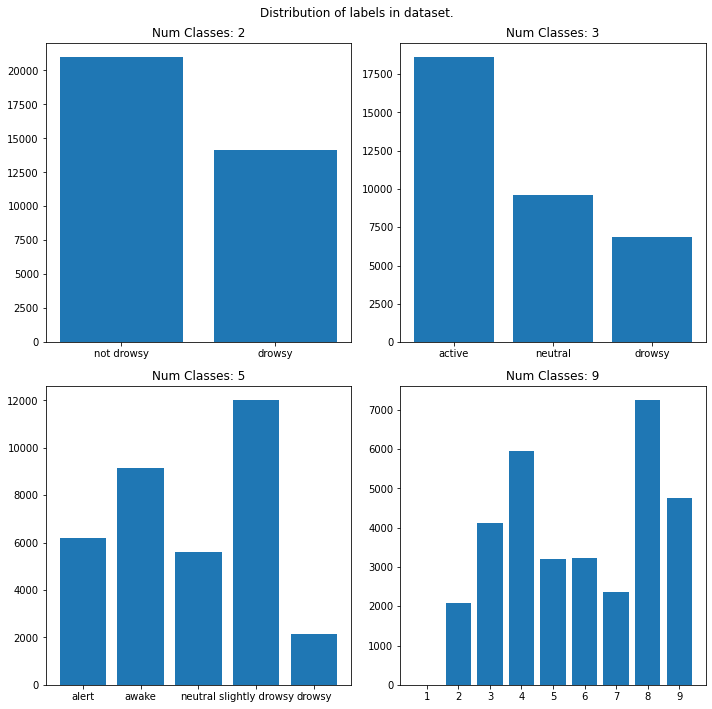

In [9]:
plt.rcParams["figure.figsize"] = 10,10
num_targets_options = 2,3,5,9
rows = math.floor(len(num_targets_options)/2)
cols = math.ceil(len(num_targets_options)/2)
fig,axes = plt.subplots(rows, cols)


for num_targets,ax in zip(num_targets_options, axes.flatten()):
    data = get_feature_data(data_path=config.PATHS.WINDOW_FEATURES)
    X, y = preprocess_feature_data(feature_data=data,
                                   exclude_sess_type=session_type_mapping[base_config["exclude_by"]], num_targets=num_targets)

    ax.hist(y, bins=[x-.5 for x in range(num_targets+1)], align='mid', rwidth=.8)
    ax.set_xticks(range(num_targets))
    ax.set_xticklabels(label_names_dict[num_targets])
    ax.set_title(f"Num Classes: {num_targets}")
plt.suptitle("Distribution of labels in dataset.")
plt.tight_layout()
plt.show()